In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

# Checkpoint 2: Funding Type Analysis 

In [2]:
#First Read the dataframe.
master_frame=pd.read_csv(r'C:\Users\DELL\Desktop\data science training\master_frame.csv')

In [3]:
master_frame.head(50)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
3,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,HKG
4,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
5,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
6,/organization/0xdata,seed,3000000.0,H2O.ai,Analytics,USA
7,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA
8,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA
9,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA


In [4]:
master_frame['funding_round_type'].unique()                    #To find the unique values in the column

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [5]:
#As acc. to problem we only want 'seed','venture','angel','private_equity' funding_round_type so we extract only those.

In [6]:
list=['seed','venture','angel','private_equity']
master_frame=master_frame.loc[(master_frame['funding_round_type'].isin(list))]

In [7]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
4,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
5,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


In [8]:
master_frame.shape                 #To find the No of rows and columns.

(75123, 6)

In [9]:
#Now we find the average investment of 'seed','venture','angel','private_equity'.

In [10]:
d=master_frame.groupby(by='funding_round_type')
d=round(d['raised_amount_usd'].mean().sort_values(ascending=False),2)

In [11]:
d

funding_round_type
private_equity    73938486.28
venture           11724222.69
angel               971573.89
seed                747827.95
Name: raised_amount_usd, dtype: float64

In [12]:
da=pd.DataFrame(d)
da

,raised_amount_usd
funding_round_type,
private_equity,73938486.28
venture,11724222.69
angel,971573.89
seed,747827.95


In [13]:
d_f=da[(da['raised_amount_usd']>=5000000) & (da['raised_amount_usd']<=15000000)]

In [14]:
d_f

,raised_amount_usd
funding_round_type,
venture,11724222.69


In [15]:
master_frame=master_frame.loc[master_frame['funding_round_type']=='venture']

In [16]:
master_frame.describe()

,raised_amount_usd
count,4.780900e+04
mean,1.172422e+07
std,8.821571e+07
min,0.000000e+00
25%,1.600000e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


In [17]:
master_frame.head(40)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
5,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
7,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA
8,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA
9,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA
15,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,USA
21,/organization/10-minutes-with,venture,4000000.0,10 Minutes With,Education,GBR
25,/organization/1000memories,venture,2520000.0,1000memories,Curated Web,USA
29,/organization/1000museums-com,venture,265940.0,1000museums.com,Curated Web,USA


In [18]:
len(master_frame['country_code'])

47809

# Checkpoint 3: Country Analysis 

In [19]:
eng=pd.read_csv(r'C:\Users\DELL\Desktop\data science training\english_countries.csv')   
#This is the dataset which we get from web.

In [20]:
top=pd.merge(master_frame,eng,on='country_code') #here we merge master_frame with eng on  the basis of Country code

In [21]:
top.head(10)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Official_lang
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,No
1,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,IND,No
2,/organization/247-learning-private,venture,4000000.0,24x7 Learning,EdTech|Education|Systems,IND,No
3,/organization/3dsoc,venture,1240000.0,3DSoC,3D|Mobile,IND,No
4,/organization/3dsoc,venture,825000.0,3DSoC,3D|Mobile,IND,No
5,/organization/a-little-world,venture,6410000.0,A LITTLE WORLD,Finance,IND,No
6,/organization/acb-india-limited,venture,25090000.0,ACB (India) Limited,Energy|Mining Technologies,IND,No
7,/organization/adlabs-imagica,venture,8180000.0,Adlabs Imagica,Entertainment|Tourism,IND,No
8,/organization/agile,venture,5740000.0,Agile,Finance|Finance Technology|FinTech|Insurance,IND,No
9,/organization/agrostar,venture,4000000.0,Agrostar,E-Commerce,IND,No


In [22]:
round(100*((top.isnull().sum())/(len(top))),4)

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
country_code          0.0
Official_lang         0.0
dtype: float64

In [23]:
len(top['country_code'])

40824

# Now we find top9 countries

In [24]:
top9=top.groupby(by='country_code')
top9=round(top9['raised_amount_usd'].sum().sort_values(ascending=False),2)

In [25]:
top9

country_code
USA    4.200680e+11
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
SGP    2.793918e+09
IRL    1.669286e+09
AUS    1.319029e+09
NZL    4.483164e+08
ZAF    2.337131e+08
NGA    1.834400e+08
PHL    1.144997e+08
PAK    8.312500e+07
KEN    5.394000e+07
GHA    3.120000e+07
MLT    1.772830e+07
KNA    1.500000e+07
TTO    8.500000e+06
UGA    2.500000e+06
BWA    2.250000e+06
MUS    1.500000e+06
CMR    3.595610e+05
Name: raised_amount_usd, dtype: float64

In [26]:
top9=pd.DataFrame(top9)

In [27]:
top9.head(9)

,raised_amount_usd
country_code,
USA,4.200680e+11
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
SGP,2.793918e+09
IRL,1.669286e+09
AUS,1.319029e+09
NZL,4.483164e+08
ZAF,2.337131e+08


# Now we choose top-3 Countries

In [127]:
#As per the problem we only want to work on top 3 countries so select top 3 countries.

In [128]:
l=['USA','GBR','IND']
top3=top.loc[(top['country_code'].isin(l))]

In [129]:
top3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 40048
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   38803 non-null  object 
 1   funding_round_type  38803 non-null  object 
 2   raised_amount_usd   38803 non-null  float64
 3   name                38803 non-null  object 
 4   category_list       38803 non-null  object 
 5   country_code        38803 non-null  object 
 6   Official_lang       38803 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.4+ MB


In [30]:
top3['country_code'].value_counts()

USA    35943
GBR     2041
IND      819
Name: country_code, dtype: int64

In [31]:
top3['country_code'].unique()

array(['IND', 'USA', 'GBR'], dtype=object)

# Checkpoint 4: Sector Analysis 1

In [32]:
mapping=pd.read_csv(r'C:\Users\DELL\Desktop\data science training\Spark Funds Industrial Assignment - 1\Spark Funds Industrial Assignment - 1\mapping.csv')

In [33]:
round(100*((mapping.isnull().sum())/(len(top))),4)

category_list                              0.0024
Automotive & Sports                        0.0000
Blanks                                     0.0000
Cleantech / Semiconductors                 0.0000
Entertainment                              0.0000
Health                                     0.0000
Manufacturing                              0.0000
News, Search and Messaging                 0.0000
Others                                     0.0000
Social, Finance, Analytics, Advertising    0.0000
dtype: float64

In [130]:
mapping.describe()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,687.000000,687.0,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,0.032023,0.0,0.077147,0.129549,0.091703,0.058224,0.104803,0.283843,0.222707
std,0.176190,0.0,0.267019,0.336051,0.288817,0.234337,0.306523,0.451190,0.416367
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
mapping.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [36]:
mapping.tail(6)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
682,Weddings,0,0,0,1,0,0,0,0,0
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0
687,Young Adults,0,0,0,0,0,0,0,1,0


In [37]:
mapping=mapping[~mapping['category_list'].isnull()]

In [38]:
round(100*((mapping.isnull().sum())/(len(top))),4)

category_list                              0.0
Automotive & Sports                        0.0
Blanks                                     0.0
Cleantech / Semiconductors                 0.0
Entertainment                              0.0
Health                                     0.0
Manufacturing                              0.0
News, Search and Messaging                 0.0
Others                                     0.0
Social, Finance, Analytics, Advertising    0.0
dtype: float64

In [39]:
mapping['category_list'].unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bankin

In [40]:
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,0,1


In [41]:
mapping['category_list'] = mapping['category_list'].apply(lambda x:x.split('|')[0])   #As per the prblem

C:\Users\DELL\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
len(mapping['category_list'])

687

In [43]:
mapping['category_list']=mapping['category_list'].apply(lambda x:x.replace('0','na'))

C:\Users\DELL\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
mapping['category_list'].unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alternative Medicine', 'Alumni',
       'Analytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bank

In [45]:
mapping.tail()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0
687,Young Adults,0,0,0,0,0,0,0,1,0


In [46]:
main_sector=pd.melt(mapping,id_vars='category_list',var_name='Main_Sector')

In [47]:
main_sector.head(20)

,category_list,Main_Sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
5,Ad Targeting,Automotive & Sports,0
6,Advanced Materials,Automotive & Sports,0
7,Adventure Travel,Automotive & Sports,1
8,Advertising,Automotive & Sports,0
9,Advertising Exchanges,Automotive & Sports,0


In [48]:
main_sector=main_sector.loc[main_sector['value']==1]

In [49]:
main_sector.head(10)

,category_list,Main_Sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
56,Bicycles,Automotive & Sports,1
68,Boating Industry,Automotive & Sports,1
86,CAD,Automotive & Sports,1
92,Cars,Automotive & Sports,1
187,Design,Automotive & Sports,1


In [50]:
main_sector.reset_index(drop='index',inplace=True)

In [51]:
main_sector.head(10)

,category_list,Main_Sector,value
0,Adventure Travel,Automotive & Sports,1
1,Aerospace,Automotive & Sports,1
2,Auto,Automotive & Sports,1
3,Automated Kiosk,Automotive & Sports,1
4,Automotive,Automotive & Sports,1
5,Bicycles,Automotive & Sports,1
6,Boating Industry,Automotive & Sports,1
7,CAD,Automotive & Sports,1
8,Cars,Automotive & Sports,1
9,Design,Automotive & Sports,1


In [131]:
main_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   Main_Sector    687 non-null    object
dtypes: object(2)
memory usage: 10.9+ KB


In [53]:
main_sector.drop(['value'],axis=1,inplace=True)  #As we dont need the value column because it contain the 
                                                 #same value for all i.e.1

In [54]:
main_sector

,category_list,Main_Sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports
...,...,...
682,Social Recruiting,"Social, Finance, Analytics, Advertising"
683,Social Television,"Social, Finance, Analytics, Advertising"
684,Social Travel,"Social, Finance, Analytics, Advertising"
685,Stock Exchanges,"Social, Finance, Analytics, Advertising"


# Checkpoint 5: Sector Analysis 2

In [55]:
top3

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Official_lang
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,No
1,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,IND,No
2,/organization/247-learning-private,venture,4000000.0,24x7 Learning,EdTech|Education|Systems,IND,No
3,/organization/3dsoc,venture,1240000.0,3DSoC,3D|Mobile,IND,No
4,/organization/3dsoc,venture,825000.0,3DSoC,3D|Mobile,IND,No
...,...,...,...,...,...,...,...
40044,/organization/zubka,venture,3919186.0,Zubka,Consulting,GBR,Yes
40045,/organization/zutux,venture,1503926.0,Zutux,E-Commerce|Furniture,GBR,Yes
40046,/organization/zyncd,venture,144451.0,Zyncd,Crowdsourcing|Knowledge Management,GBR,Yes
40047,/organization/zynstra,venture,8400000.0,Zynstra,Software,GBR,Yes


In [56]:
m=pd.merge(top3,main_sector,on='category_list')

In [57]:
m

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Official_lang,Main_Sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,No,Entertainment
1,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,USA,Yes,Entertainment
2,/organization/genius-monkey,venture,2000000.0,Genius Monkey,Media,USA,Yes,Entertainment
3,/organization/glass-media,venture,30000.0,Glass Media,Media,USA,Yes,Entertainment
4,/organization/marine-construction-technologies,venture,125000.0,Marine Construction Technologies,Media,USA,Yes,Entertainment
...,...,...,...,...,...,...,...,...
21088,/organization/worldremit,venture,2106000.0,WorldRemit,P2P Money Transfer,GBR,Yes,"Social, Finance, Analytics, Advertising"
21089,/organization/worldremit,venture,100000000.0,WorldRemit,P2P Money Transfer,GBR,Yes,"Social, Finance, Analytics, Advertising"
21090,/organization/worldremit,venture,2143000.0,WorldRemit,P2P Money Transfer,GBR,Yes,"Social, Finance, Analytics, Advertising"
21091,/organization/worldremit,venture,1560000.0,WorldRemit,P2P Money Transfer,GBR,Yes,"Social, Finance, Analytics, Advertising"


# USA=D1

In [58]:
D1=m.loc[(m['country_code']=='USA') & (m['raised_amount_usd']>=5000000) & (m['raised_amount_usd']<=15000000)]

In [59]:
D1

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Official_lang,Main_Sector
1,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,USA,Yes,Entertainment
56,/organization/1stdibs,venture,15000000.0,1stdibs,E-Commerce,USA,Yes,Others
63,/organization/abes-market,venture,5000000.0,Abe's Market,E-Commerce,USA,Yes,Others
64,/organization/abes-market,venture,10000000.0,Abe's Market,E-Commerce,USA,Yes,Others
67,/organization/ac-moore-craft-store,venture,10000000.0,A.C. Moore,E-Commerce,USA,Yes,Others
...,...,...,...,...,...,...,...,...
21070,/organization/ubiquitous-energy,venture,5800000.0,Ubiquitous Energy,Clean Energy,USA,Yes,Cleantech / Semiconductors
21074,/organization/user-interface,venture,8250000.0,User Interface,User Interface,USA,Yes,Others
21076,/organization/venture-vehicles-inc,venture,6000000.0,Persu Mobility,Electric Vehicles,USA,Yes,Automotive & Sports
21077,/organization/washio,venture,10500000.0,Washio,Service Industries,USA,Yes,Others


In [60]:
Count_USA=D1.groupby(by='Main_Sector')['raised_amount_usd'].count().sort_values(ascending=False)
Sum_USA=D1.groupby(by='Main_Sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x: '{:.2f}'.format(x))

In [61]:
Count_USA

Main_Sector
Others                                     2071
Cleantech / Semiconductors                 1738
Health                                      601
News, Search and Messaging                  552
Social, Finance, Analytics, Advertising     528
Manufacturing                               411
Entertainment                               198
Automotive & Sports                          40
Name: raised_amount_usd, dtype: int64

In [62]:
Sum_USA

Main_Sector
Others                                     18506811462.00
Cleantech / Semiconductors                 15955987578.00
Health                                      5405749916.00
News, Search and Messaging                  4770547632.00
Social, Finance, Analytics, Advertising     4514591379.00
Manufacturing                               3758864507.00
Entertainment                               1702119994.00
Automotive & Sports                          311202844.00
Name: raised_amount_usd, dtype: object

In [63]:
Count_USA=pd.DataFrame(Count_USA)
Sum_USA=pd.DataFrame(Sum_USA)

In [64]:
Count_USA

,raised_amount_usd
Main_Sector,
Others,2071
Cleantech / Semiconductors,1738
Health,601
"News, Search and Messaging",552
"Social, Finance, Analytics, Advertising",528
Manufacturing,411
Entertainment,198
Automotive & Sports,40


In [65]:
Count_USA.sum()

raised_amount_usd    6139
dtype: int64

In [66]:
Sum_USA

,raised_amount_usd
Main_Sector,
Others,18506811462.00
Cleantech / Semiconductors,15955987578.00
Health,5405749916.00
"News, Search and Messaging",4770547632.00
"Social, Finance, Analytics, Advertising",4514591379.00
Manufacturing,3758864507.00
Entertainment,1702119994.00
Automotive & Sports,311202844.00


In [67]:
Sum_USA.sum()

raised_amount_usd    18506811462.0015955987578.005405749916.0047705...
dtype: object

In [68]:
Count_USA.rename(columns={'raised_amount_usd':'Count_of_investments'},inplace=True)

In [69]:
Count_USA

,Count_of_investments
Main_Sector,
Others,2071
Cleantech / Semiconductors,1738
Health,601
"News, Search and Messaging",552
"Social, Finance, Analytics, Advertising",528
Manufacturing,411
Entertainment,198
Automotive & Sports,40


In [70]:
Sum_USA.rename(columns={'raised_amount_usd':'Total_amount_of_investment'},inplace=True)

In [71]:
Sum_USA

,Total_amount_of_investment
Main_Sector,
Others,18506811462.00
Cleantech / Semiconductors,15955987578.00
Health,5405749916.00
"News, Search and Messaging",4770547632.00
"Social, Finance, Analytics, Advertising",4514591379.00
Manufacturing,3758864507.00
Entertainment,1702119994.00
Automotive & Sports,311202844.00


In [72]:
D1=pd.merge(D1,Count_USA,on='Main_Sector')

In [73]:
D1

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Official_lang,Main_Sector,Count_of_investments
0,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,USA,Yes,Entertainment,198
1,/organization/stir-crazy,venture,14000000.0,Stir Crazy,Restaurants,USA,Yes,Entertainment,198
2,/organization/beacon-2,venture,7500000.0,Beacon,Travel,USA,Yes,Entertainment,198
3,/organization/farelogix,venture,6000000.0,Farelogix,Travel,USA,Yes,Entertainment,198
4,/organization/hotel-booking-solutions-incorpor...,venture,5000000.0,Hotel Booking Solutions Incorporated,Travel,USA,Yes,Entertainment,198
...,...,...,...,...,...,...,...,...,...
6134,/organization/ehang,venture,10000000.0,Ehang,Drones,USA,Yes,Automotive & Sports,40
6135,/organization/isopur-fluid-technologies,venture,8000000.0,ISOPur Fluid Technologies,Heavy Industry,USA,Yes,Automotive & Sports,40
6136,/organization/nistevo,venture,8000000.0,Nistevo,Transportation,USA,Yes,Automotive & Sports,40
6137,/organization/stio,venture,5900000.0,Stio,Designers,USA,Yes,Automotive & Sports,40


In [74]:
D1=pd.merge(D1,Sum_USA,on='Main_Sector')

In [75]:
D1

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Official_lang,Main_Sector,Count_of_investments,Total_amount_of_investment
0,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,USA,Yes,Entertainment,198,1702119994.00
1,/organization/stir-crazy,venture,14000000.0,Stir Crazy,Restaurants,USA,Yes,Entertainment,198,1702119994.00
2,/organization/beacon-2,venture,7500000.0,Beacon,Travel,USA,Yes,Entertainment,198,1702119994.00
3,/organization/farelogix,venture,6000000.0,Farelogix,Travel,USA,Yes,Entertainment,198,1702119994.00
4,/organization/hotel-booking-solutions-incorpor...,venture,5000000.0,Hotel Booking Solutions Incorporated,Travel,USA,Yes,Entertainment,198,1702119994.00
...,...,...,...,...,...,...,...,...,...,...
6134,/organization/ehang,venture,10000000.0,Ehang,Drones,USA,Yes,Automotive & Sports,40,311202844.00
6135,/organization/isopur-fluid-technologies,venture,8000000.0,ISOPur Fluid Technologies,Heavy Industry,USA,Yes,Automotive & Sports,40,311202844.00
6136,/organization/nistevo,venture,8000000.0,Nistevo,Transportation,USA,Yes,Automotive & Sports,40,311202844.00
6137,/organization/stio,venture,5900000.0,Stio,Designers,USA,Yes,Automotive & Sports,40,311202844.00


# Company which receieved Highest Insvestment In Top Sector(USA)

In [132]:
D1[D1['Main_Sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd,Count_of_investments
name,,
Virtustream,64300000.0,12426
Capella Photonics,54968051.0,12426
Approva,50100000.0,10355
Bit9,48433533.0,10355
BTI Systems,48000000.0,8284
...,...,...
SANpulse Technologies,5000000.0,2071
Breker Verification Systems,5000000.0,2071
Arigo,5000000.0,2071


# Company which receieved Highest Insvestment In  Second Best Sector(USA)

In [77]:
D1[D1['Main_Sector']=='Cleantech / Semiconductors'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd,Count_of_investments
name,,
Tigo Energy,68739496.0,13904
ForSight Labs,61300001.0,12166
SCIenergy,55375423.0,10428
ALung Technologies,54110403.0,8690
Stretch,52000000.0,8690
...,...,...
Sente Inc.,5000000.0,1738
CorNova,5000000.0,1738
SciFluor Life Sciences,5000000.0,1738


# GBR=D2

In [78]:
D2=m.loc[(m['country_code']=='GBR') & (m['raised_amount_usd']>=5000000) & (m['raised_amount_usd']<=15000000)]

In [79]:
D2

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Official_lang,Main_Sector
499,/organization/acs-clothing,venture,13359377.0,ACS Clothing,E-Commerce,GBR,Yes,Others
500,/organization/acs-clothing,venture,12879637.0,ACS Clothing,E-Commerce,GBR,Yes,Others
503,/organization/bathrooms-com,venture,12060066.0,Bathrooms.com,E-Commerce,GBR,Yes,Others
506,/organization/chemistdirect,venture,10000000.0,ChemistDirect,E-Commerce,GBR,Yes,Others
507,/organization/crawford-scientific,venture,6469163.0,Crawford Scientific,E-Commerce,GBR,Yes,Others
...,...,...,...,...,...,...,...,...
20902,/organization/deltadot,venture,6100000.0,deltaDOT,Life Sciences,GBR,Yes,Others
20915,/organization/the-fresh-group,venture,9542943.0,The fresh Group,Event Management,GBR,Yes,Entertainment
20937,/organization/canburg,venture,13010774.0,Canburg,Furniture,GBR,Yes,Manufacturing
20977,/organization/perpetuum,venture,10181710.0,Perpetuum,Wireless,GBR,Yes,Entertainment


In [80]:
Count_GBR=D2.groupby(by='Main_Sector')['raised_amount_usd'].count().sort_values(ascending=False)
Sum_GBR=D2.groupby(by='Main_Sector')['raised_amount_usd'].sum().sort_values(ascending=False)

In [81]:
Count_GBR

Main_Sector
Cleantech / Semiconductors                 107
Others                                     106
News, Search and Messaging                  31
Manufacturing                               29
Entertainment                               29
Social, Finance, Analytics, Advertising     24
Health                                      13
Automotive & Sports                          3
Name: raised_amount_usd, dtype: int64

In [82]:
Sum_GBR

Main_Sector
Cleantech / Semiconductors                 942829246.0
Others                                     931205523.0
News, Search and Messaging                 274140008.0
Entertainment                              260004421.0
Manufacturing                              257049312.0
Social, Finance, Analytics, Advertising    205607606.0
Health                                     112740187.0
Automotive & Sports                         29352177.0
Name: raised_amount_usd, dtype: float64

In [83]:
Count_GBR=pd.DataFrame(Count_GBR)
Sum_GBR=pd.DataFrame(Sum_GBR)

In [84]:
Count_GBR

,raised_amount_usd
Main_Sector,
Cleantech / Semiconductors,107
Others,106
"News, Search and Messaging",31
Manufacturing,29
Entertainment,29
"Social, Finance, Analytics, Advertising",24
Health,13
Automotive & Sports,3


In [85]:
Count_GBR.sum()

raised_amount_usd    342
dtype: int64

In [86]:
Sum_GBR

,raised_amount_usd
Main_Sector,
Cleantech / Semiconductors,942829246.0
Others,931205523.0
"News, Search and Messaging",274140008.0
Entertainment,260004421.0
Manufacturing,257049312.0
"Social, Finance, Analytics, Advertising",205607606.0
Health,112740187.0
Automotive & Sports,29352177.0


In [87]:
Sum_GBR.sum().apply(lambda x: '{:.2f}'.format(x))

raised_amount_usd    3012928480.00
dtype: object

In [88]:
Count_GBR.rename(columns={'raised_amount_usd':'Count_of_investments'},inplace=True)
Sum_GBR.rename(columns={'raised_amount_usd':'Total_amount_of_investment'},inplace=True)

In [89]:
D2=pd.merge(D2,Count_GBR,on='Main_Sector')

In [90]:
D2

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Official_lang,Main_Sector,Count_of_investments
0,/organization/acs-clothing,venture,13359377.0,ACS Clothing,E-Commerce,GBR,Yes,Others,106
1,/organization/acs-clothing,venture,12879637.0,ACS Clothing,E-Commerce,GBR,Yes,Others,106
2,/organization/bathrooms-com,venture,12060066.0,Bathrooms.com,E-Commerce,GBR,Yes,Others,106
3,/organization/chemistdirect,venture,10000000.0,ChemistDirect,E-Commerce,GBR,Yes,Others,106
4,/organization/crawford-scientific,venture,6469163.0,Crawford Scientific,E-Commerce,GBR,Yes,Others,106
...,...,...,...,...,...,...,...,...,...
337,/organization/topivert,venture,12509719.0,TopiVert,Health Care,GBR,Yes,Health,13
338,/organization/serentis-ltd,venture,10133972.0,Serentis,Pharmaceuticals,GBR,Yes,Health,13
339,/organization/prodrive,venture,9345794.0,Prodrive,Automotive,GBR,Yes,Automotive & Sports,3
340,/organization/streetcar,venture,12430126.0,Streetcar,Automotive,GBR,Yes,Automotive & Sports,3


In [91]:
D2=pd.merge(D2,Sum_GBR,on='Main_Sector')

In [92]:
D2

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Official_lang,Main_Sector,Count_of_investments,Total_amount_of_investment
0,/organization/acs-clothing,venture,13359377.0,ACS Clothing,E-Commerce,GBR,Yes,Others,106,931205523.0
1,/organization/acs-clothing,venture,12879637.0,ACS Clothing,E-Commerce,GBR,Yes,Others,106,931205523.0
2,/organization/bathrooms-com,venture,12060066.0,Bathrooms.com,E-Commerce,GBR,Yes,Others,106,931205523.0
3,/organization/chemistdirect,venture,10000000.0,ChemistDirect,E-Commerce,GBR,Yes,Others,106,931205523.0
4,/organization/crawford-scientific,venture,6469163.0,Crawford Scientific,E-Commerce,GBR,Yes,Others,106,931205523.0
...,...,...,...,...,...,...,...,...,...,...
337,/organization/topivert,venture,12509719.0,TopiVert,Health Care,GBR,Yes,Health,13,112740187.0
338,/organization/serentis-ltd,venture,10133972.0,Serentis,Pharmaceuticals,GBR,Yes,Health,13,112740187.0
339,/organization/prodrive,venture,9345794.0,Prodrive,Automotive,GBR,Yes,Automotive & Sports,3,29352177.0
340,/organization/streetcar,venture,12430126.0,Streetcar,Automotive,GBR,Yes,Automotive & Sports,3,29352177.0


# Company which receieved Highest Insvestment In Top Best Sector(GBR)

In [93]:
D2[D2['Main_Sector']=='Cleantech / Semiconductors'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd,Count_of_investments,Total_amount_of_investment
name,,,
EUSA Pharma,35600000.0,321,2.828488e+09
Elixent,25000000.0,214,1.885658e+09
Immune Targeting Systems,20320961.0,214,1.885658e+09
Plaxica,19940192.0,214,1.885658e+09
Xention,19051289.0,214,1.885658e+09
...,...,...,...
Lamellar Biomedical,5301059.0,107,9.428292e+08
MMIC Solutions,5250000.0,107,9.428292e+08
Flowline,5104587.0,107,9.428292e+08


# Company which receieved Highest Insvestment In Second Best Sector(GBR)

In [94]:
D2[D2['Main_Sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd,Count_of_investments,Total_amount_of_investment
name,,,
Electric Cloud,37000000.0,424,3.724822e+09
SenSage,36250000.0,424,3.724822e+09
Enigmatec,32500000.0,318,2.793617e+09
OpenCloud,27972766.0,318,2.793617e+09
MyOptique Group,27694613.0,212,1.862411e+09
...,...,...,...
Almondy,5407412.0,106,9.312055e+08
Gear4music.com,5385352.0,106,9.312055e+08
Bacula Systems,5000000.0,106,9.312055e+08


# IND=D3

In [95]:
D3=m.loc[(m['country_code']=='IND') & (m['raised_amount_usd']>=5000000) & (m['raised_amount_usd']<=15000000)]

In [96]:
D3

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Official_lang,Main_Sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,No,Entertainment
9,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,IND,No,Others
15,/organization/carwale,venture,7000000.0,CarWale,E-Commerce,IND,No,Others
20,/organization/firstcry-com,venture,15000000.0,FirstCry.com,E-Commerce,IND,No,Others
21,/organization/firstcry-com,venture,10000000.0,FirstCry.com,E-Commerce,IND,No,Others
...,...,...,...,...,...,...,...,...
20054,/organization/power-mech-projects,venture,13000000.0,Power Mech Projects,Construction,IND,No,Manufacturing
20064,/organization/prabhat-fresh,venture,12800000.0,Prabhat fresh,Distribution,IND,No,Others
20120,/organization/roadrunnr,venture,11000000.0,Roadrunnr,Delivery,IND,No,"News, Search and Messaging"
20121,/organization/roadrunnr,venture,10000000.0,Roadrunnr,Delivery,IND,No,"News, Search and Messaging"


In [97]:
Count_IND=D3.groupby(by='Main_Sector')['raised_amount_usd'].count().sort_values(ascending=False)
Sum_IND=D3.groupby(by='Main_Sector')['raised_amount_usd'].sum().sort_values(ascending=False)

In [98]:
Count_IND

Main_Sector
Others                                     74
News, Search and Messaging                 31
Social, Finance, Analytics, Advertising    22
Entertainment                              19
Cleantech / Semiconductors                 14
Health                                     13
Manufacturing                              11
Automotive & Sports                         2
Name: raised_amount_usd, dtype: int64

In [99]:
Sum_IND

Main_Sector
Others                                     675169507.0
News, Search and Messaging                 267118770.0
Social, Finance, Analytics, Advertising    183606050.0
Entertainment                              156150000.0
Health                                     114540000.0
Manufacturing                              106700000.0
Cleantech / Semiconductors                 105180000.0
Automotive & Sports                         21400000.0
Name: raised_amount_usd, dtype: float64

In [100]:
Count_IND=pd.DataFrame(Count_IND)
Sum_IND=pd.DataFrame(Sum_IND)

In [101]:
Count_IND.rename(columns={'raised_amount_usd':'Count_of_investments'},inplace=True)
Sum_IND.rename(columns={'raised_amount_usd':'Total_amount_of_investment'},inplace=True)

In [102]:
Count_IND

,Count_of_investments
Main_Sector,
Others,74
"News, Search and Messaging",31
"Social, Finance, Analytics, Advertising",22
Entertainment,19
Cleantech / Semiconductors,14
Health,13
Manufacturing,11
Automotive & Sports,2


In [103]:
Count_IND.sum()

Count_of_investments    186
dtype: int64

In [104]:
Sum_IND

,Total_amount_of_investment
Main_Sector,
Others,675169507.0
"News, Search and Messaging",267118770.0
"Social, Finance, Analytics, Advertising",183606050.0
Entertainment,156150000.0
Health,114540000.0
Manufacturing,106700000.0
Cleantech / Semiconductors,105180000.0
Automotive & Sports,21400000.0


In [105]:
Sum_IND.sum().apply(lambda x: '{:.2f}'.format(x))

Total_amount_of_investment    1629864327.00
dtype: object

In [106]:
D3=pd.merge(D3,Count_IND,on='Main_Sector')

In [107]:
D3=pd.merge(D3,Sum_IND,on='Main_Sector')

In [108]:
D3

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Official_lang,Main_Sector,Count_of_investments,Total_amount_of_investment
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,No,Entertainment,19,156150000.0
1,/organization/chef-s-basket,venture,6000000.0,Chef's Basket,Restaurants,IND,No,Entertainment,19,156150000.0
2,/organization/cleartrip,venture,8000000.0,Cleartrip,Travel,IND,No,Entertainment,19,156150000.0
3,/organization/cleartrip,venture,5400000.0,Cleartrip,Travel,IND,No,Entertainment,19,156150000.0
4,/organization/tripfactory,venture,10000000.0,Tripfactory,Travel,IND,No,Entertainment,19,156150000.0
...,...,...,...,...,...,...,...,...,...,...
181,/organization/forus-health,venture,8400000.0,Forus Health,Health Care,IND,No,Health,13,114540000.0
182,/organization/mydentist,venture,8000000.0,MyDentist,Health Care,IND,No,Health,13,114540000.0
183,/organization/mydentist,venture,10000000.0,MyDentist,Health Care,IND,No,Health,13,114540000.0
184,/organization/incredible-technologies-pvt-ltd,venture,15000000.0,Incredible Technologies (CredR),Automotive,IND,No,Automotive & Sports,2,21400000.0


# Company which receieved Highest Insvestment In Top Sector(IND)

In [109]:
D3[D3['Main_Sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd,Count_of_investments,Total_amount_of_investment
name,,,
FirstCry.com,39000000.0,222,2.025509e+09
Myntra,38000000.0,296,2.700678e+09
CommonFloor,32900000.0,222,2.025509e+09
Pepperfry.com,28000000.0,222,2.025509e+09
ItzCash Card Ltd.,25000000.0,148,1.350339e+09
NxtGen Data Center & Cloud Services,22300000.0,148,1.350339e+09
India Property Online,19000000.0,148,1.350339e+09
Hippocampus Learning Centres,18000000.0,148,1.350339e+09
Tejas Networks India,15000000.0,74,6.751695e+08


# Company which receieved Highest Insvestment In Second Best Sector(IND)

In [110]:
D3[D3['Main_Sector']=='News, Search and Messaging'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd,Count_of_investments,Total_amount_of_investment
name,,,
GupShup,33000000.0,93,801356310.0
IMImobile,23000000.0,62,534237540.0
SMS GupShup,22000000.0,62,534237540.0
Roadrunnr,21000000.0,62,534237540.0
Guruji,15000000.0,62,534237540.0
Mobile2Win India,15000000.0,31,267118770.0
Bluestone.com,15000000.0,62,534237540.0
Quikr,14000000.0,62,534237540.0
TeleDNA,10490000.0,31,267118770.0


# Checkpoint 6: Plots

In [111]:
ma=pd.read_csv(r'C:\Users\DELL\Desktop\data science training\master_frame.csv')

# PLOT-1

# A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type

In [112]:
list1=['seed','venture','private_equity']
mf=ma.loc[(ma['funding_round_type'].isin(list1))]

In [113]:
mf['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity'], dtype=object)

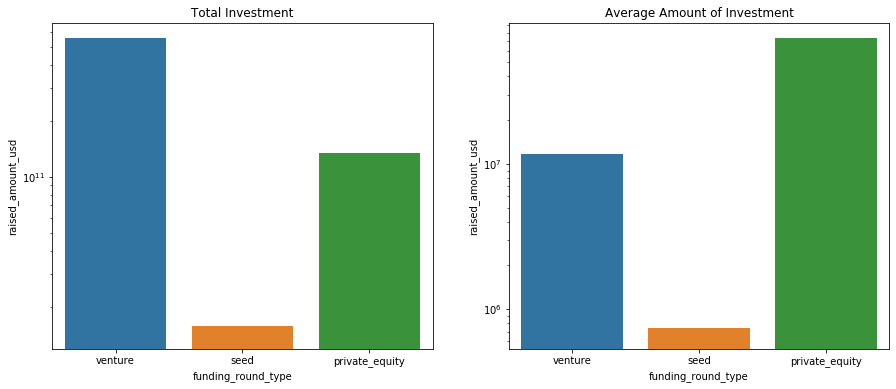

In [114]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title('Total Investment')
plt.yscale('log')
sb.barplot(x='funding_round_type',y='raised_amount_usd',data=mf,estimator=np.sum,ci=False)

plt.subplot(122)
plt.title('Average Amount of Investment')
plt.yscale('log')
sb.barplot(x='funding_round_type',y='raised_amount_usd',data=mf,estimator=np.mean,ci=False)

# PLOT-2

# A plot showing the top 9 countries against the total amount of investments of funding type FT


In [115]:
top9

,raised_amount_usd
country_code,
USA,4.200680e+11
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
SGP,2.793918e+09
IRL,1.669286e+09
AUS,1.319029e+09
NZL,4.483164e+08
ZAF,2.337131e+08


In [116]:
t9=top9.head(9)

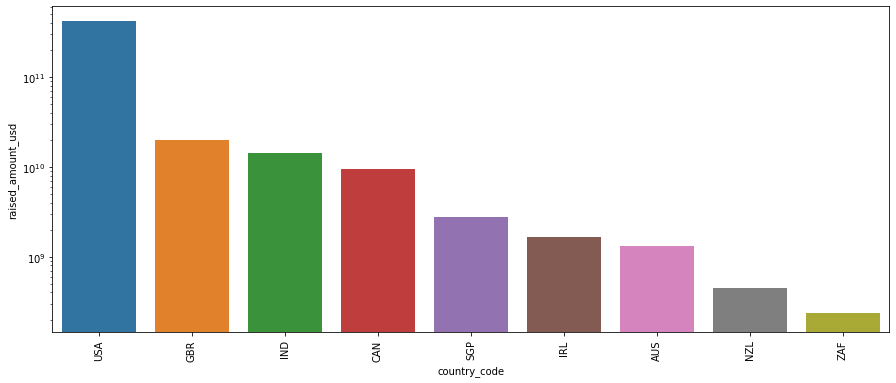

In [117]:
plt.figure(figsize=(15,6))
plt.yscale('log')
plt.xticks(rotation=90)
sb.barplot(x=t9.index[:],y='raised_amount_usd',data=t9)

# PLOT-3

# A plot showing the number of investments in the top 3 sectors of the top 3 countries

In [118]:
Count_USA

,Count_of_investments
Main_Sector,
Others,2071
Cleantech / Semiconductors,1738
Health,601
"News, Search and Messaging",552
"Social, Finance, Analytics, Advertising",528
Manufacturing,411
Entertainment,198
Automotive & Sports,40


In [119]:
USA3=Count_USA.head(3)

In [120]:
USA3

,Count_of_investments
Main_Sector,
Others,2071
Cleantech / Semiconductors,1738
Health,601


In [121]:
Count_GBR

,Count_of_investments
Main_Sector,
Cleantech / Semiconductors,107
Others,106
"News, Search and Messaging",31
Manufacturing,29
Entertainment,29
"Social, Finance, Analytics, Advertising",24
Health,13
Automotive & Sports,3


In [122]:
GBR3=Count_GBR.head(3)

In [123]:
GBR3

,Count_of_investments
Main_Sector,
Cleantech / Semiconductors,107
Others,106
"News, Search and Messaging",31


In [124]:
Count_IND

,Count_of_investments
Main_Sector,
Others,74
"News, Search and Messaging",31
"Social, Finance, Analytics, Advertising",22
Entertainment,19
Cleantech / Semiconductors,14
Health,13
Manufacturing,11
Automotive & Sports,2


In [125]:
IND3=Count_IND.head(3)
IND3

,Count_of_investments
Main_Sector,
Others,74
"News, Search and Messaging",31
"Social, Finance, Analytics, Advertising",22


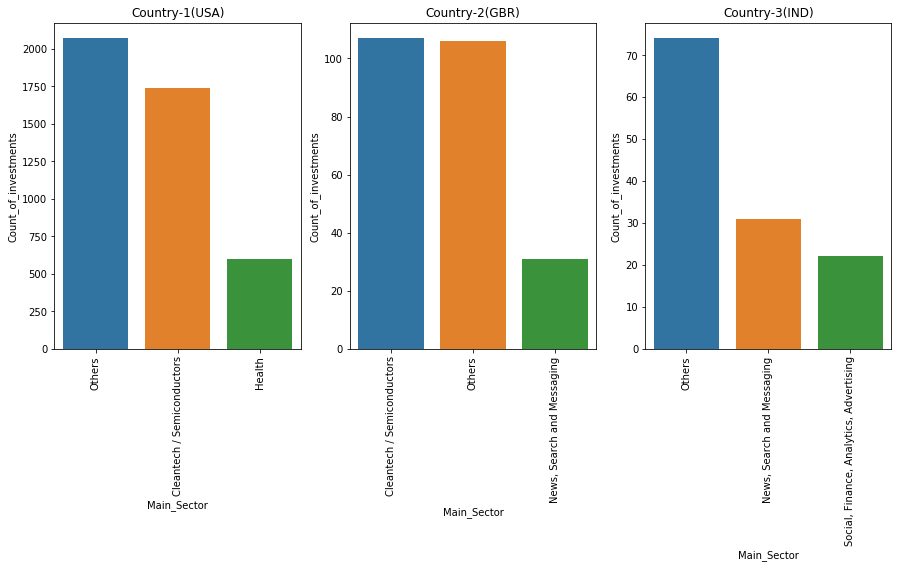

In [134]:
plt.figure(figsize=(15,6))


plt.subplot(131)
plt.title('Country-1(USA)')
plt.xticks(rotation=90)
sb.barplot(x=USA3.index[:],y='Count_of_investments',data=USA3)

plt.subplot(132)
plt.title('Country-2(GBR)')
plt.xticks(rotation=90)
sb.barplot(x=GBR3.index[:],y='Count_of_investments',data=GBR3)


plt.subplot(133)
plt.title('Country-3(IND)')
plt.xticks(rotation=90)
sb.barplot(x=IND3.index[:],y='Count_of_investments',data=IND3)